In [15]:
!pip install lightgbm

In [44]:
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline 
from sklearn import set_config 
from sklearn.decomposition import PCA

In [7]:
dataset = pd.read_csv("/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv")
df = pd.DataFrame(dataset)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
len(df)

569

In [33]:
X = df.drop(columns = ['id','Unnamed: 32','diagnosis'],axis = 1)
Y = df["diagnosis"]

<Axes: >

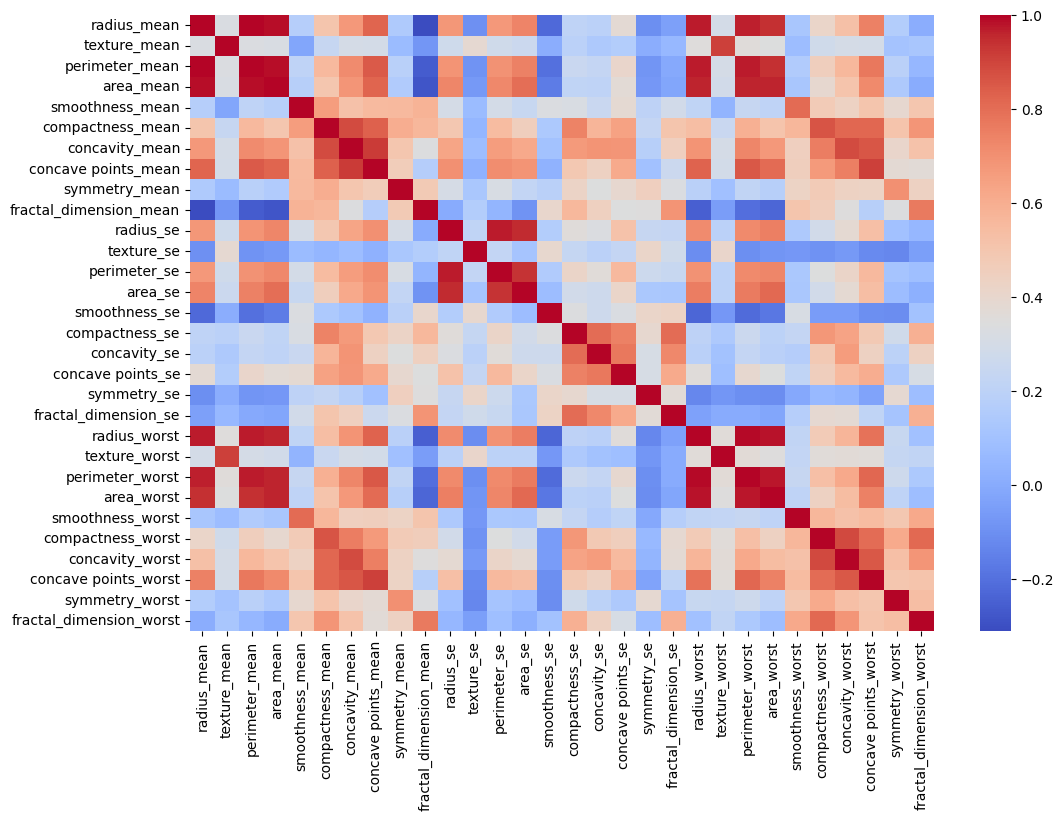

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,8))
sns.heatmap(X.corr(),annot = False,cmap = "coolwarm")

In [42]:
model = Pipeline(
    [
        ("StandardScalar",StandardScaler()),
        ("Principal Component Analysis",PCA(n_components = 10)),
        ("LGBM",LGBMClassifier(max_depth = 7,boosting_type = 'dart'))
    ]
)
encoder = LabelEncoder()
Y_enc = encoder.fit_transform(Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
model.fit(X_train,Y_train)

[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1520
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Pipeline(steps=[('StandardScalar', StandardScaler()),
                ('Principal Component Analysis', PCA(n_components=10)),
                ('LGBM', LGBMClassifier(boosting_type='dart', max_depth=7))])

In [46]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           B       0.99      0.97      0.98        71
           M       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [51]:
query = X.iloc[98]
def prediction(query, model):
    return model.predict(query)
ans = prediction([query],model)

In [52]:
ans

array(['B'], dtype=object)

In [55]:
df.iloc[98].reset_index()

,index,98
0,id,862485
1,diagnosis,B
2,radius_mean,11.6
3,texture_mean,12.84
4,perimeter_mean,74.34
5,area_mean,412.6
6,smoothness_mean,0.08983
7,compactness_mean,0.07525
8,concavity_mean,0.04196
9,concave points_mean,0.0335
